In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer  # Handling missing values
from sklearn.preprocessing import StandardScaler  # Handling feature  scaling
from sklearn.preprocessing import OrdinalEncoder  # ordinal encodind
## Pipelines 
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
import numpy as np 
from sklearn.datasets import make_classification

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix, precision_score, recall_score, f1_score

In [49]:
df= pd.read_excel("data\Concrete_Data.xls")

In [60]:
df.columns = ['Cement', 'Blast', 'Fly_Ash', 'Water', 'Superplasticizer', 'Coarse_Aggregate', 'Fine_Aggregate', 'Age', 'Concrete_compressive_strength']

In [61]:
df.head()

,Cement,Blast,Fly_Ash,Water,Superplasticizer,Coarse_Aggregate,Fine_Aggregate,Age,Concrete_compressive_strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075


In [63]:
## Independent and dependent(target) feature
X=df.drop(labels=['Concrete_compressive_strength'],axis=1)
Y=df[['Concrete_compressive_strength']]

In [64]:
cols =  ['Cement', 'Blast', 'Fly_Ash', 'Water', 'Superplasticizer', 'Coarse_Aggregate', 'Fine_Aggregate', 'Age']

In [65]:
from sklearn.impute import SimpleImputer  # Handling missing values
from sklearn.preprocessing import StandardScaler  # Handling feature  scaling
from sklearn.preprocessing import OrdinalEncoder  # ordinal encodind
## Pipelines 
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [66]:
## Numerical Pipeline
num_pipeline=Pipeline(
    steps=[
    ('imputer',SimpleImputer(strategy='median')),
    ('scaler',StandardScaler())

    ]

)


preprocessor=ColumnTransformer([
('num_pipeline',num_pipeline,cols)
])

In [67]:
## Model Training

from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [68]:
## Train test split

from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.10,random_state=123)

In [69]:
## adjusted r2-score 
def adj_r2_score(y_true, y_pred, n_features):
    r2 = r2_score(y_true, y_pred)
    adj_r2 = 1 - ((1 - r2) * (len(y_true) - 1)) / (len(y_true) - n_features - 1)
    return adj_r2


In [70]:
import numpy as np
def evaluate_model(true, predicted,n_features):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    adj_r2_square=adj_r2_score(true,predicted,n_features)
    #accuracyscore = accuracy_score(y_train,y_test)
    return mae, rmse, r2_square,adj_r2_square

In [71]:
## Train multiple models

models={
    'LinearRegression':LinearRegression(),
    'Lasso':Lasso(),
    'Ridge':Ridge(),
    'Elasticnet':ElasticNet(),
    'Decesion_tree_regressor':DecisionTreeRegressor(),
    'Random_forest_regressor':RandomForestRegressor()
    
}
trained_model_list=[]
model_list=[]
r2_list=[]
#accuracyscore=[]
for i in range(len(list(models))):
    model=list(models.values())[i]
    model.fit(X_train,y_train)

    #Make Predictions
    y_train=model.predict(X_train)
    y_pred=model.predict(X_test)

    mae, rmse, r2_square,adj_r2_square,=evaluate_model(y_test,y_pred,X_train.shape[1])

    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    print(r2_list.append(r2_square))

    print('Model Training Performance')
    print("RMSE:",rmse)
    print("MAE:",mae)
    print("R2 score",r2_square*100)
    print("Ajusted R2 score",adj_r2_square*100)
    
    print('='*35)
    print('\n')

LinearRegression
None
Model Training Performance
RMSE: 9.84695016612183
MAE: 7.678502654502002
R2 score 65.48491644557363
Ajusted R2 score 62.547462526047994


Lasso
None
Model Training Performance
RMSE: 9.806160053526414
MAE: 7.652009518642755
R2 score 65.77027549059797
Ajusted R2 score 62.85710744724461


Ridge
None
Model Training Performance
RMSE: 9.806149980709884
MAE: 7.652002865200776
R2 score 65.77034581161168
Ajusted R2 score 62.85718375302544


Elasticnet
None
Model Training Performance
RMSE: 9.784702305390594
MAE: 7.6362637541423934
R2 score 65.91991392156686
Ajusted R2 score 63.01948106382787


Decesion_tree_regressor
None
Model Training Performance
RMSE: 10.44623019334643
MAE: 7.806935028515587
R2 score 61.15593855178161
Ajusted R2 score 57.850060981720475


Random_forest_regressor
None
Model Training Performance
RMSE: 10.012707828602064
MAE: 7.6593452243547215
R2 score 64.31312363831063
Ajusted R2 score 61.275942671358344




In [72]:
model_list

['LinearRegression',
 'Lasso',
 'Ridge',
 'Elasticnet',
 'Decesion_tree_regressor',
 'Random_forest_regressor']

In [73]:
r2_list

[0.6548491644557364,
 0.6577027549059797,
 0.6577034581161167,
 0.6591991392156686,
 0.6115593855178161,
 0.6431312363831063]

In [32]:
data = {'model_list':['LinearRegression', 'Lasso', 'Ridge', 'Elasticnet', 'Decesion_tree_regressor', 'Random_forest_regressor'],
       'r2_list':[0.6034820201589282, 0.6056882732491845, 0.6056893148120457, 0.6068840173348653, 0.5191902703635898, 0.5620547407296568]}
data = pd.DataFrame(data)
data

,model_list,r2_list
0,LinearRegression,0.603482
1,Lasso,0.605688
2,Ridge,0.605689
3,Elasticnet,0.606884
4,Decesion_tree_regressor,0.519190
5,Random_forest_regressor,0.562055


In [33]:
import seaborn as sns
from matplotlib import pyplot as plt

<Axes: xlabel='r2_list', ylabel='model_list'>

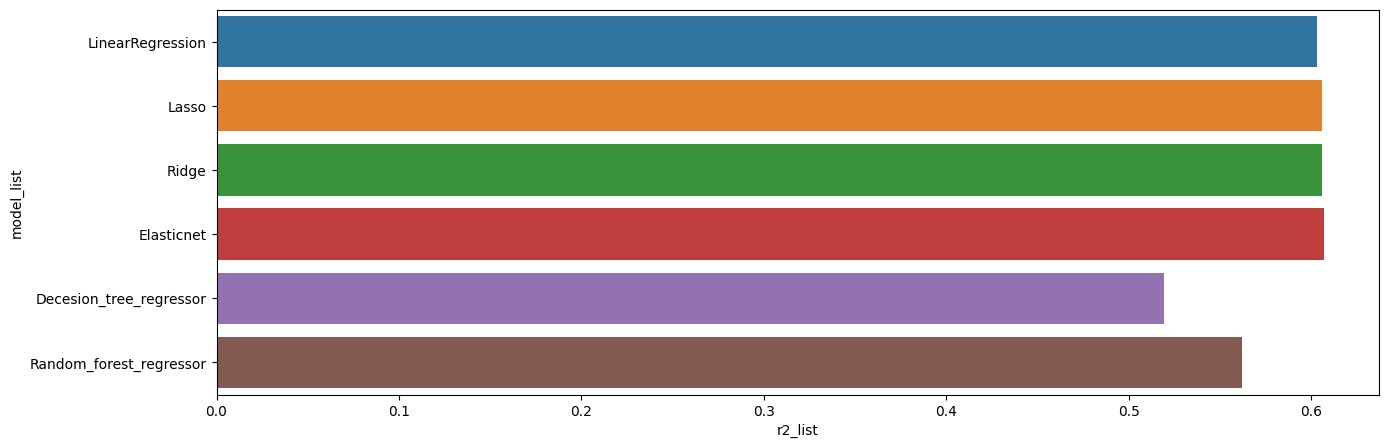

In [34]:
plt.figure(figsize=(15, 5))
sns.barplot(data=data,y='model_list',x='r2_list')